# Imports


In [1]:
#General
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from os.path import join
from google.colab import drive

# Dataset

## Data import



In [2]:
drive.mount('/content/gdrive')
file_path="/content/gdrive/MyDrive/Colab_Notebooks/0.Kaggle_Problems/Regression/Kaggle_Weather_prediction/Dataset/Summary_of_Weather.csv"
weather = pd.read_csv(file_path)
file_path="/content/gdrive/MyDrive/Colab_Notebooks/0.Kaggle_Problems/Regression/Kaggle_Weather_prediction/Dataset/Weather_Station_Locations.csv"
stations = pd.read_csv(file_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-2-42524797bd52>:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv(file_path)


In [3]:
print(weather.shape)
weather.head()

(119040, 31)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(stations.shape)
stations.head()

(161, 8)


,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


## Data exploration and cleaning

In [5]:
weather.columns,stations.columns

(Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
        'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
        'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
        'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
       dtype='object'),
 Index(['WBAN', 'NAME', 'STATE/COUNTRY ID', 'LAT', 'LON', 'ELEV', 'Latitude',
        'Longitude'],
       dtype='object'))

In [6]:
weather.isna().sum()

,0
STA,0
Date,0
Precip,0
WindGustSpd,118508
MaxTemp,0
MinTemp,0
MeanTemp,0
Snowfall,1163
PoorWeather,84803
YR,0


As we can see many features don't have any values, so i'm just going to get rid of these features.
Also other features (as PRPT, MAX, MIN, MEAN, SNF are just Precip, MinTemp, MaxTemp, MeanTemp, Snowfall but with a different metric). Therefore i am going to get rid of them as well.

In [7]:
useful_features = ['STA', 'Date', 'YR', 'MO', 'DA', 'Precip', 'MinTemp', 'MaxTemp',
                   'MeanTemp', 'Snowfall', 'PoorWeather']

filtered_weather = weather[useful_features]

In [8]:
weather = filtered_weather.copy()
weather.head()

,STA,Date,YR,MO,DA,Precip,MinTemp,MaxTemp,MeanTemp,Snowfall,PoorWeather
0,10001,1942-7-1,42,7,1,1.016,22.222222,25.555556,23.888889,0.0,NaN
1,10001,1942-7-2,42,7,2,0,21.666667,28.888889,25.555556,0.0,NaN
2,10001,1942-7-3,42,7,3,2.54,22.222222,26.111111,24.444444,0.0,NaN
3,10001,1942-7-4,42,7,4,2.54,22.222222,26.666667,24.444444,0.0,NaN
4,10001,1942-7-5,42,7,5,0,21.666667,26.666667,24.444444,0.0,NaN


PoorWeather doesn't look right since it has too many missing values to be such a simple weather measure.

In [9]:
print(f"Values count for PoorWeather:",weather['PoorWeather'].value_counts().sum())
print(weather['PoorWeather'].value_counts())

Values count for PoorWeather: 34237
PoorWeather
1             25846
1.0            6134
0               870
1     1         310
100000          263
1 1             133
1 1  1           96
1000             91
100001           62
1    1           56
101000           56
1000001000       52
1  1             49
1000001001       45
11               39
1100000          16
1001             16
1   1 1          14
101001           14
1000101001       13
1000101000        9
11 1              8
1000000           7
1000000000        6
1     1  1        5
11    1           5
1010001000        5
1010001001        2
1 0  1            2
1   1 1  1        2
1000100001        2
1101000           2
10001001          1
1     0           1
1000100000        1
1 0               1
1101001           1
1   1             1
1        1        1
Name: count, dtype: int64


The 'PoorWeather' is defined as follows:

Copy of TSHDSBRSGF

Day with:
- Thunder
- Sleet
- Hail
- Dust or Sand
- Smoke or Haze
- Blowing Snow
- Rain
- Snow
- Glaze
- Fog

Yes = 1, No = 0

From a fist look, a one-hot encoding of these possibilities would be ideal, but since these bad metereological effects affect weather temperatures negatively, i think it is more suitable to convert these values as such:
- 1 if there were any registered weather condition
- 0 otherwhise

In [10]:
weather.loc[weather["PoorWeather"].isna(), "PoorWeather"] = 0
weather.loc[weather["PoorWeather"]!= 0, "PoorWeather"] = 1
weather["PoorWeather"] = weather["PoorWeather"].astype('object')
print(f"PoorWeather dtype:",weather["PoorWeather"].dtype)
weather["PoorWeather"].value_counts()

PoorWeather dtype: object


,count
PoorWeather,
0,84803
1,34237


Let's now try to fix the "Precip" feature, related to the amount of precipitation in mm.


"T" in Precipitation stands for ***traces of precipitation*** and since i want this feature to be dtype: float i need to take a look at the lowest non-zero value in order to define a suitable float substitute for T.

In [11]:
temp = weather[weather["Precip"]!="T"]
weather2 = temp.copy()
weather2["Precip"] = weather2["Precip"].astype('float64')
print(f"Min non-zero value as Precip:",weather2["Precip"].loc[weather2["Precip"]>0].min())

Min non-zero value as Precip: 0.254


I am then going to set the corrisponding float64 value for T as 0.1 and then change the dtype of this feature to float64

In [12]:
weather.loc[weather["Precip"] == "T", "Precip"] = 0.1
weather["Precip"] = weather["Precip"].astype('float64')

The last thing to look at is the "Snowfall" feature since it has a few missing values

In [13]:
print(weather["Snowfall"].isna().value_counts(),"\n\n")
weather[weather["Snowfall"].isna()]

Snowfall
False    117877
True       1163
Name: count, dtype: int64 




,STA,Date,YR,MO,DA,Precip,MinTemp,MaxTemp,MeanTemp,Snowfall,PoorWeather
2722,10101,1945-4-2,45,4,2,45.212,21.666667,30.000000,26.111111,NaN,0
2746,10101,1945-4-26,45,4,26,3.556,24.444444,31.111111,27.777778,NaN,0
13529,10803,1940-12-26,40,12,26,0.000,22.777778,30.555556,26.666667,NaN,0
17907,10807,1945-11-19,45,11,19,108.204,18.888889,30.555556,24.444444,NaN,0
30501,11901,1942-10-3,42,10,3,0.100,-17.777778,-17.777778,-17.777778,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
97418,44401,1945-11-12,45,11,12,14.224,-1.111111,2.777778,1.111111,NaN,1
97420,44401,1945-11-14,45,11,14,0.100,2.222222,12.777778,7.777778,NaN,1
97525,50301,1943-10-31,43,10,31,0.000,23.333333,29.444444,26.666667,NaN,0
97590,50301,1944-1-4,44,1,4,0.000,23.888889,30.000000,26.666667,NaN,0


The first thing i can think of is to set it to 0 where the MinTemp > x since there cannot be snow where the atmospheric temperature is greater than 0. I just need to find a good 'x' value. Since i don't have this information i am going to guess it based on my personal experience and set it equal to 5.

In [14]:
weather.loc[(weather["Snowfall"].isna()) & (weather["MinTemp"] > 5), "Snowfall"] = 0
weather[weather["Snowfall"].isna()]

,STA,Date,YR,MO,DA,Precip,MinTemp,MaxTemp,MeanTemp,Snowfall,PoorWeather
30501,11901,1942-10-3,42,10,3,0.100,-17.777778,-17.777778,-17.777778,NaN,1
35646,12702,1944-3-13,44,3,13,0.000,-17.777778,-17.777778,-17.777778,NaN,0
36078,12702,1945-5-19,45,5,19,0.000,-17.777778,-17.777778,-17.777778,NaN,0
36205,12706,1945-4-10,45,4,10,0.100,-17.777778,-17.777778,-17.777778,NaN,1
36224,12706,1945-4-29,45,4,29,0.000,-17.777778,-17.777778,-17.777778,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
97209,43302,1945-11-1,45,11,1,0.000,-17.777778,-17.777778,-17.777778,NaN,0
97347,43305,1945-12-18,45,12,18,1.778,1.111111,5.000000,3.333333,NaN,1
97409,44401,1945-11-3,45,11,3,1.016,1.666667,8.333333,5.000000,NaN,1
97418,44401,1945-11-12,45,11,12,14.224,-1.111111,2.777778,1.111111,NaN,1


<Axes: >

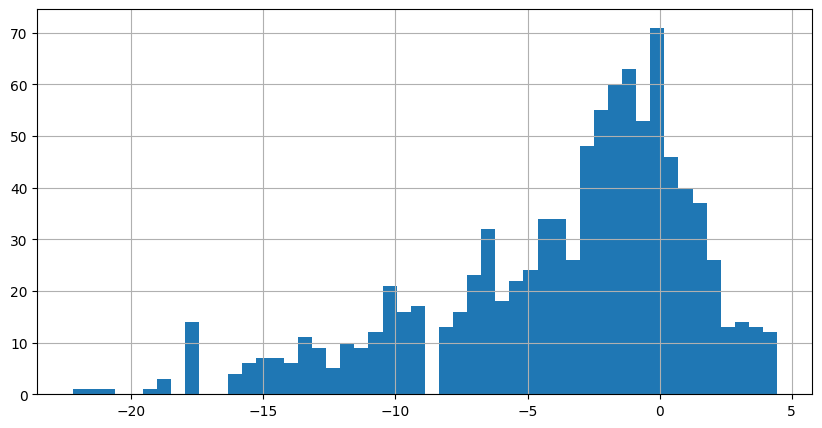

In [18]:
weather["MinTemp"].loc[(weather["Snowfall"].isna()) & (weather["MinTemp"] < 5)].hist(figsize=(10,5), bins=50)

The best idea right now would probably be to interpolate/bfill/ffill the NaN "Snowfall" data according to the same weather stations ordered by date using:

```
weather.sort_values(['STA', 'YR', 'MO', 'DA',], ascending=[True, True, True, True])
```

The main reason why i don't think this would be too good is because we have daily measurements, so one day might have snowed a lot while others none. For this exact reason i guess i'm more prone to use the interpolation. I would prefer to not get rid of these rows since "SnowFall" is the only missing value and they all represent a part of the population where the temperatures are low.


